![alt text](RandomForest.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

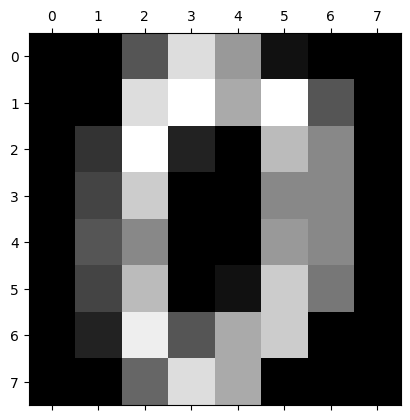

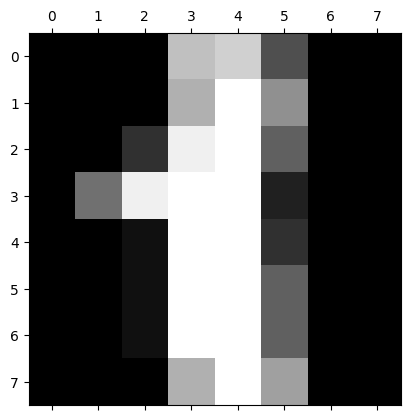

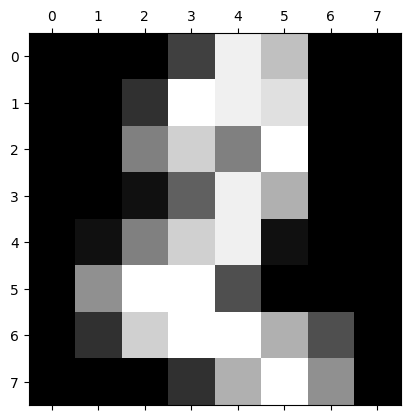

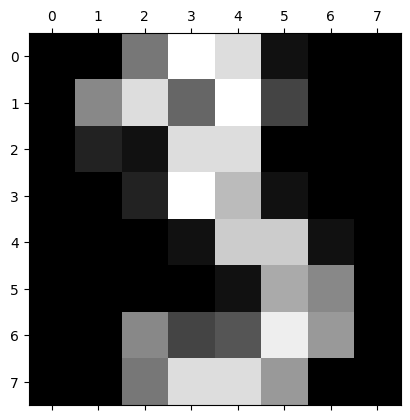

In [5]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [6]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
df = pd.DataFrame(digits.data)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
714,0.0,0.0,0.0,1.0,11.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,2.0,0.0,0.0
753,0.0,0.0,2.0,12.0,12.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,5.0,0.0,0.0,0.0
300,0.0,0.0,1.0,11.0,16.0,16.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,3.0,0.0,0.0,0.0
271,0.0,0.0,15.0,16.0,16.0,15.0,9.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,13.0,16.0,3.0,0.0,0.0,0.0
1523,0.0,0.0,3.0,13.0,16.0,15.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,16.0,7.0,0.0,0.0,0.0


In [11]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [12]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [13]:
X = df.drop('target',axis=1)
Y = df['target']

In [14]:
Y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.25 , random_state=101)

In [17]:
len(X_train)

1347

In [18]:
len(X_test)

450

In [19]:
len(Y_train)

1347

In [20]:
len(Y_test)

450

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train , Y_train)

RandomForestClassifier(n_estimators=50)

**n_estimator = no. of trees (decision tree)**

In [22]:
prediction = model.predict(X_test)
prediction

array([7, 4, 7, 9, 1, 7, 5, 7, 1, 0, 1, 7, 1, 6, 6, 8, 4, 9, 7, 0, 7, 7,
       6, 0, 2, 3, 5, 0, 0, 2, 4, 7, 0, 4, 3, 7, 1, 3, 6, 4, 8, 8, 9, 9,
       7, 9, 8, 6, 4, 3, 1, 3, 5, 8, 1, 4, 5, 5, 4, 1, 7, 2, 4, 4, 5, 8,
       0, 8, 1, 0, 7, 6, 7, 8, 6, 5, 1, 2, 0, 6, 1, 0, 1, 9, 1, 2, 6, 8,
       3, 4, 6, 4, 1, 3, 2, 5, 7, 1, 5, 0, 0, 6, 5, 0, 9, 8, 1, 9, 3, 2,
       7, 1, 7, 4, 8, 2, 4, 1, 2, 1, 3, 8, 9, 3, 1, 6, 9, 8, 3, 2, 7, 1,
       8, 9, 5, 2, 6, 5, 0, 3, 4, 0, 5, 0, 1, 1, 7, 4, 8, 6, 1, 3, 9, 1,
       4, 9, 5, 1, 7, 6, 7, 3, 0, 7, 3, 4, 9, 9, 8, 9, 6, 1, 0, 7, 7, 4,
       8, 4, 4, 7, 5, 9, 7, 9, 8, 7, 0, 4, 7, 4, 7, 1, 0, 4, 9, 4, 5, 7,
       2, 2, 4, 2, 3, 3, 5, 3, 9, 8, 4, 3, 4, 5, 2, 1, 6, 9, 9, 5, 7, 5,
       5, 7, 6, 2, 4, 6, 7, 5, 1, 9, 2, 2, 9, 6, 5, 2, 5, 3, 6, 8, 3, 5,
       5, 1, 9, 6, 0, 5, 1, 3, 8, 8, 4, 4, 4, 0, 5, 0, 4, 7, 8, 2, 2, 2,
       5, 9, 3, 9, 3, 5, 6, 4, 3, 2, 6, 1, 1, 7, 5, 2, 1, 1, 2, 1, 9, 5,
       5, 5, 4, 4, 9, 4, 9, 8, 0, 7, 4, 3, 4, 8, 8,

In [23]:
model.score(X_test , Y_test) #<---- (predicted value , actual value)

0.9755555555555555

In [24]:
cm = confusion_matrix(Y_test,prediction)
cm

array([[43,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 51,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 50,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 37,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

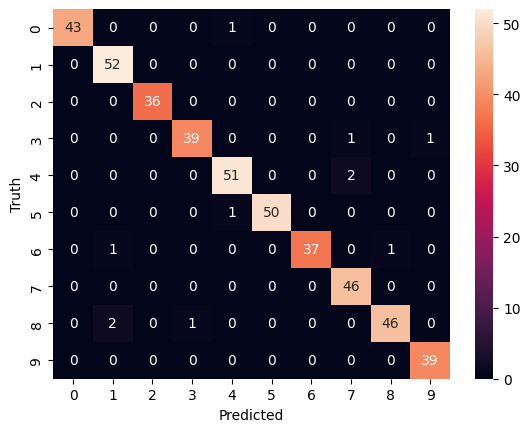

In [25]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()